<a href="https://colab.research.google.com/github/Vickt-dr/IA/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                             # para lidar com calculos
import matplotlib.pyplot as plt                # para a plotagem
from IPython.display import Image, display, HTML
import pandas as pd
plt.rcParams["figure.figsize"] = (10,6)

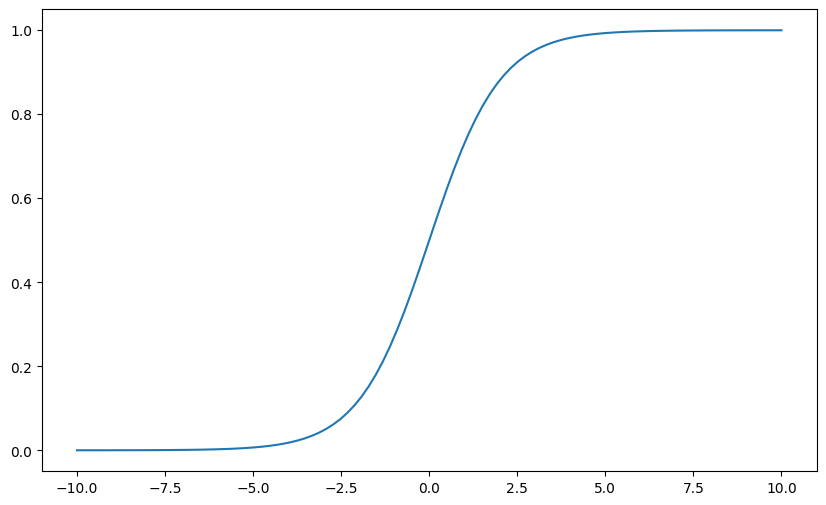

In [3]:
def sigmoid(t):
    return 1/(1+np.exp(-t))

args = np.linspace(-10,10,100)
values = sigmoid(args)
plt.plot(args,values)

In [4]:
def mse(y1,y2):
    return np.mean(np.square(y1 - y2))

In [6]:
def sigmoid_derivative(p):
    return sigmoid(p) * (1 - sigmoid(p))

In [7]:
def Vc_RC(t,r=5,c=0.1,vin=1):
    """
    Tensão de um capacitor em um circuito RC
    """
    tau = -t/(r*c)
    vc  = vin*(1 - np.exp(tau))

    return vc

In [9]:
# Class definition
class NeuralNetwork:
    def __init__(self, x, y, n=15):
        """
        Definição de um objeto de rede neural

        argumentos:
        x: a entrada de treino
        y: a saída desejada no treino
        n: Número de neurônios na camada escondida
        """
        self.entrada = x
        self.pesos_0 = np.random.rand(self.entrada.shape[1],n)
        self.pesos_1 = np.random.rand(self.pesos_0.shape[1],1)
        self.y = y
        self.saida = np. zeros(y.shape)

    def feedforward(self):
        # Potencial de ativação ou termo z no equacionamento
        self.pot_ativ_0 = np.dot(self.entrada, self.pesos_0)

        # Saída da camada  0
        self.camada_0 = sigmoid(self.pot_ativ_0)

        # Equações da camada 1
        self.pot_ativ_1 = np.dot(self.camada_0, self.pesos_1)
        self.camada_1 = sigmoid(self.pot_ativ_1)
        # Nota-se que a saída da camada 1 é a saída da rede

        return self.camada_1

    def backprop(self):
        d_pesos_1 = np.dot(self.camada_0.T, 2*(self.y - self.saida)*sigmoid_derivative(self.pot_ativ_1))
        d_pesos_0 = np.dot(self.entrada.T, np.dot(2*(self.y -self.saida)*sigmoid_derivative(self.pot_ativ_1), self.pesos_1.T)*sigmoid_derivative(self.pot_ativ_0))

        self.pesos_0 += d_pesos_0*0.1
        self.pesos_1 += d_pesos_1*0.1

    def train(self):
        self.saida = self.feedforward()
        self.backprop()

    def predict(self,x):
        self.entrada = x
        self.saida = self.feedforward()
        return self.saida

In [10]:
# Definindo um modelo matemático
t = np.arange(0,3,0.1)
vc = Vc_RC(t)

t = t/np.amax(t)
# Dividindo os datasets de treino e teste
porcent_treino = 60
tam_treino = int(len(vc)*porcent_treino/100)

# Entrada e saída de treino
x_train = t[:tam_treino]
y_train = vc[:tam_treino]

# Entrada e saída de teste
x_test = t[tam_treino:]
y_test = vc[tam_treino:]

# Transformando os vetores entrada e saída em coluna
x_train = x_train.reshape(tam_treino,1)
y_train = y_train.reshape(tam_treino,1)
x_test  = x_test.reshape(len(x_test),1)

# Definindo o objeto da rede neural
nn_vc_model = NeuralNetwork(x_train,y_train,n=15)

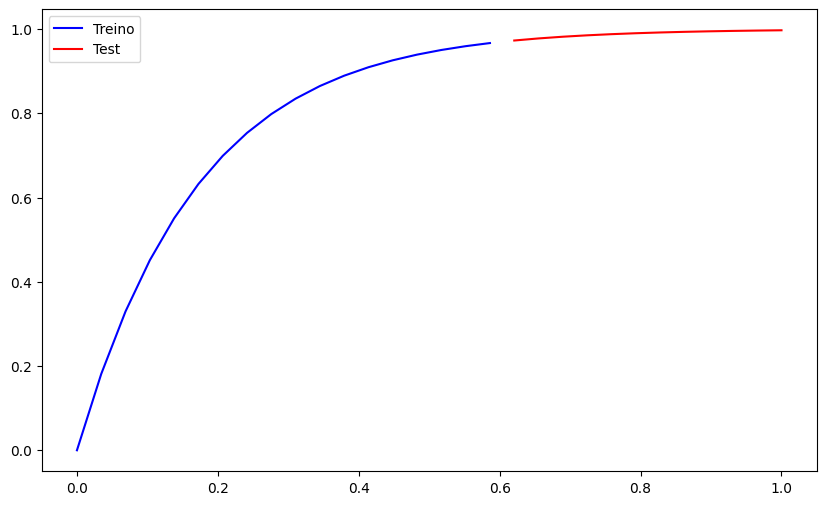

In [11]:
plt.plot(x_train.flatten(),y_train.flatten(),'b', label="Treino")
plt.plot(x_test.flatten(),y_test.flatten(),'r', label="Test")
plt.legend()
plt.show()

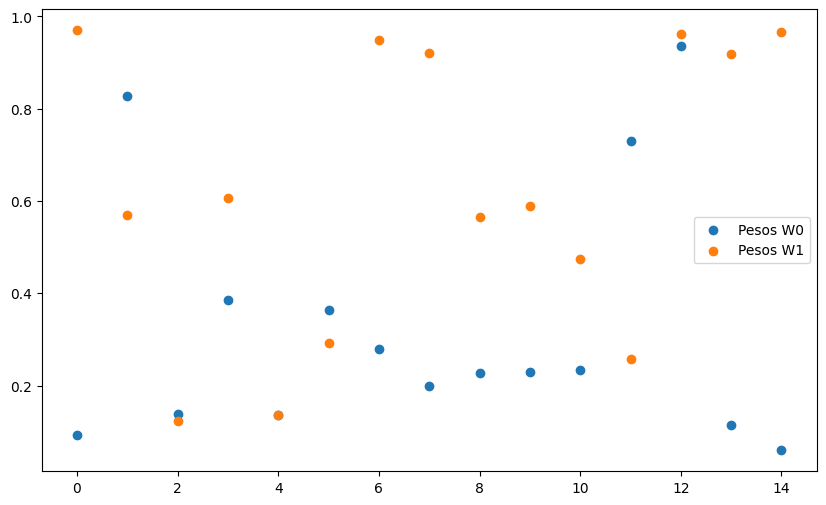

In [16]:
pesos_0 = np.array(nn_vc_model.pesos_0)
pesos_1 = np.array(nn_vc_model.pesos_1)
plt.scatter(np.arange(len(pesos_0[0])),pesos_0[0], label="Pesos W0")
plt.scatter(np.arange(len(pesos_1.flatten())),pesos_1.flatten(), label="Pesos W1")
plt.legend()



In [17]:
erro = list()

for i in range(500):
    saida_rede = nn_vc_model.feedforward() # calculando a saida da rede
    erro.append(mse(y_train, saida_rede)) # calculabdo o mse e guardando em um vetor
    nn_vc_model.train() # utilizando um metodo do objeto rede neural para treinar

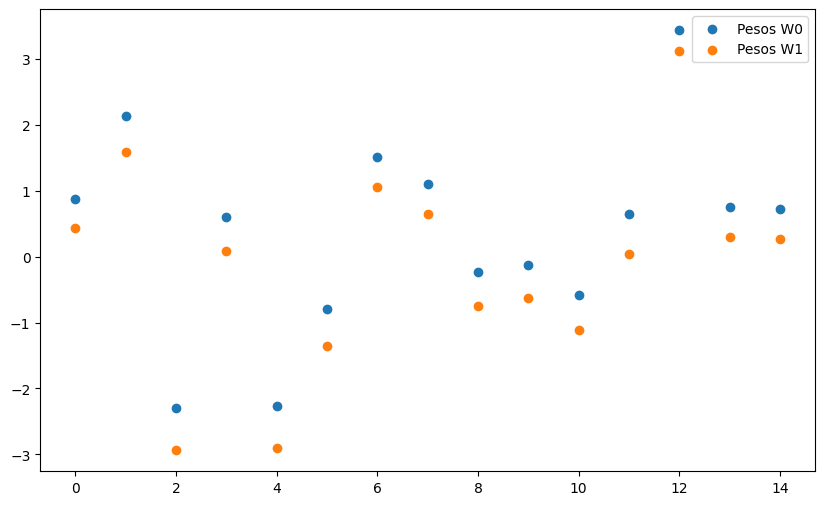

In [19]:
# Mostrando os pesos das camadas
pesos_0 = np.array(nn_vc_model.pesos_0)
pesos_1 = np.array(nn_vc_model.pesos_1)
plt.scatter(np.arange(len(pesos_0[0])),pesos_0[0], label="Pesos W0")
plt.scatter(np.arange(len(pesos_1.flatten())),pesos_1.flatten(), label="Pesos W1")
plt.legend()

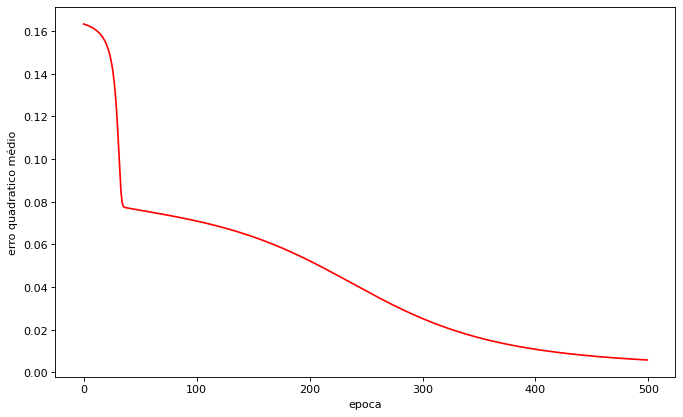

In [20]:
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.plot(erro,'r')
plt.xlabel("epoca")
plt.ylabel("erro quadratico médio")
plt.show()

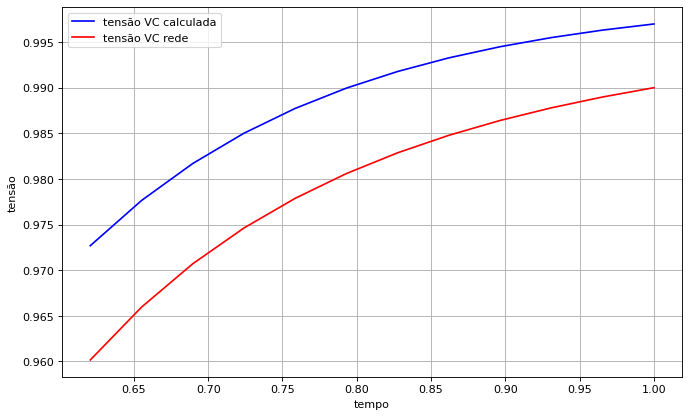

In [21]:
# transformando as matrizes de entrada em vetores para a plotagem
t          = t.flatten()
vc         = vc.flatten()

# Transformando a saida da rede neural para a plotagem
saida_rede = nn_vc_model.predict(x_test)

fig = plt.figure( figsize=(10, 6), dpi=80)
plt.plot(x_test.flatten(), y_test, 'b', label="tensão VC calculada")
plt.plot(x_test.flatten(), saida_rede, 'r', label="tensão VC rede")
plt.legend()
plt.grid()
plt.xlabel("tempo")
plt.ylabel("tensão")
plt.show()

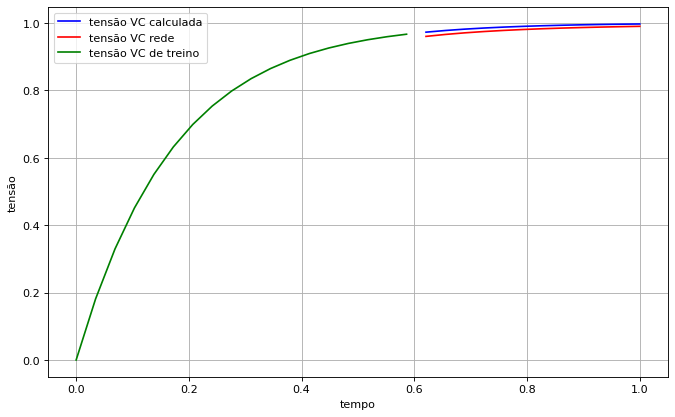

In [22]:
fig = plt.figure( figsize=(10, 6), dpi=80)
plt.plot(x_test.flatten(), y_test, 'b', label="tensão VC calculada")
plt.plot(x_test.flatten(), saida_rede, 'r', label="tensão VC rede")
plt.plot(x_train.flatten(), y_train.flatten(), 'g', label="tensão VC de treino")
plt.legend()
plt.grid()
plt.xlabel("tempo")
plt.ylabel("tensão")
plt.show()